# Loan Default Prediction EDA Notebook

This notebook performs a thorough Exploratory Data Analysis (EDA) of the LendingClub loan data, replicating

the findings and cleaning steps implemented in the basic_cleaning component of our MLflow pipeline.

# Import Libraries

In [2]:
# !pip install seaborn
# !pip install ydata-profiling
# !pip install ipywidgets
# !pip install missingno
# !pip install plotly

In [3]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from ydata_profiling import ProfileReport

# Configure plots
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Fetch Data from Weights & Biases

In [4]:
# Initialize a W&B run
run = wandb.init(project="loan_default_prediction", group="eda", save_code=True)

# Download the raw data artifact
local_path = wandb.use_artifact("raw_lending_club_data.csv:latest").file()
df = pd.read_csv(local_path)

print(f"Loaded data with shape: {df.shape}")

wandb: Currently logged in as: zcoulibalyeng (zcoulibalyeng-student). Use `wandb login --relogin` to force relogin


Loaded data with shape: (2, 144)


# Use ydata_profiling to know the data

In [5]:
profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 217807.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This is something we can do to get quickly familiar with the data

# Initial Data Exploration

In [7]:
# View the first few rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,Total amount funded in policy code 1: 2050909275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total amount funded in policy code 2: 789378849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 144 entries, id to settlement_term
dtypes: float64(143), object(1)
memory usage: 2.4+ KB


In [9]:
# Summary statistics
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check column names and data types
print("Column names and data types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Column names and data types:
id: object
member_id: float64
loan_amnt: float64
funded_amnt: float64
funded_amnt_inv: float64
term: float64
int_rate: float64
installment: float64
grade: float64
sub_grade: float64
emp_title: float64
emp_length: float64
home_ownership: float64
annual_inc: float64
verification_status: float64
issue_d: float64
loan_status: float64
pymnt_plan: float64
url: float64
desc: float64
purpose: float64
title: float64
zip_code: float64
addr_state: float64
dti: float64
delinq_2yrs: float64
earliest_cr_line: float64
inq_last_6mths: float64
mths_since_last_delinq: float64
mths_since_last_record: float64
open_acc: float64
pub_rec: float64
revol_bal: float64
revol_util: float64
total_acc: float64
initial_list_status: float64
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: float64
collection_recovery_fee: float64
last_pymnt_d: float64
last_pymnt_am

In [11]:
# Check missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_pct
})

print("Columns with missing values:")
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

Columns with missing values:
                             Missing Values  Percentage
member_id                                 2       100.0
num_tl_120dpd_2m                          2       100.0
num_bc_tl                                 2       100.0
num_il_tl                                 2       100.0
num_op_rev_tl                             2       100.0
...                                     ...         ...
collections_12_mths_ex_med                2       100.0
mths_since_last_major_derog               2       100.0
policy_code                               2       100.0
application_type                          2       100.0
settlement_term                           2       100.0

[143 rows x 2 columns]


# Target Variable Analysis

In [16]:
# Check the unique values in the loan_status column
print("Loan status categories:")
print(df['loan_status'].value_counts())

Loan status categories:
Series([], Name: count, dtype: int64)


Binary loan status distribution:
Series([], Name: proportion, dtype: float64)


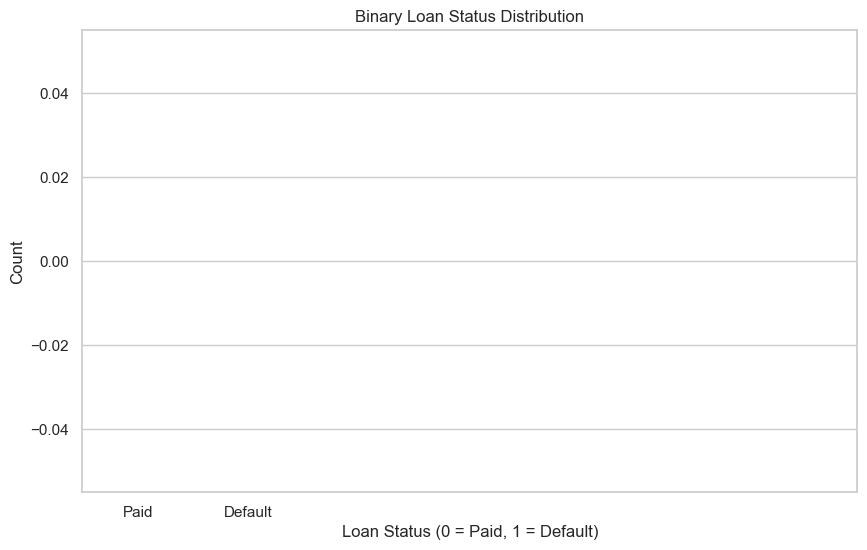

In [19]:
# Convert loan_status to binary target variable
loan_status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)

# Check the binary distribution
print("Binary loan status distribution:")
print(df['loan_status_binary'].value_counts(normalize=True) * 100)


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status_binary', data=df)
plt.title('Binary Loan Status Distribution')
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Paid', 'Default'])
plt.show()

# Data Cleaning Steps
Let's implement the cleaning steps from the basic_cleaning component:

In [20]:
# Make a copy of the data
df_clean = df.copy()

# 1. Remove rows with null target
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['loan_status'])
print(f"Dropped {initial_rows - len(df_clean)} rows with null loan_status")

# 2. Convert loan_status to binary target
df_clean['loan_status'] = df_clean['loan_status'].map(
    lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 
                        'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'] 
    else 0 if x in ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid'] 
    else np.nan
)

# Drop rows with null target after mapping
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['loan_status'])
print(f"Dropped {initial_rows - len(df_clean)} rows with null loan_status after mapping")

Dropped 2 rows with null loan_status
Dropped 0 rows with null loan_status after mapping


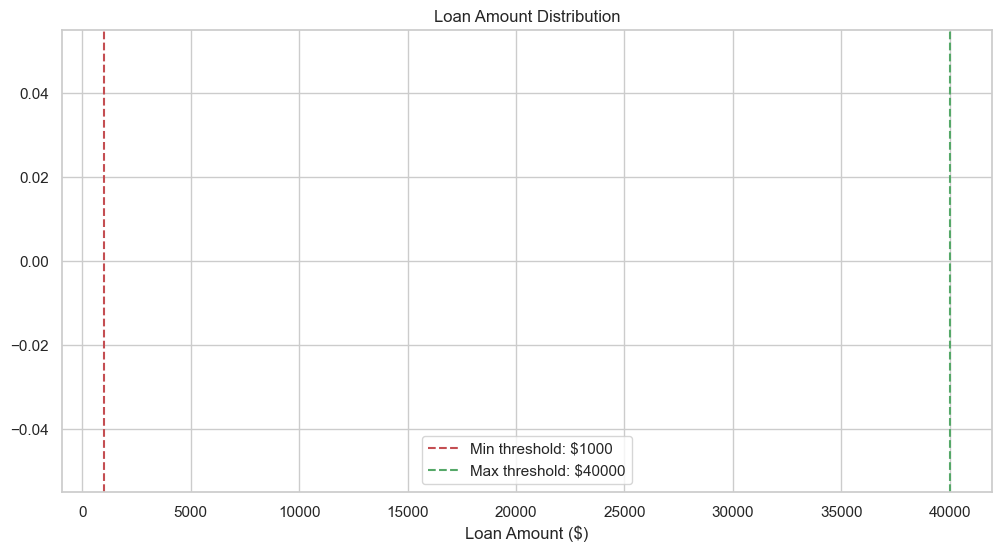

Dropped 0 rows outside loan amount range: 1000 - 40000


In [21]:
# 3. Remove outliers based on loan amount
min_loan_amount = 1000
max_loan_amount = 40000

plt.figure(figsize=(12, 6))
sns.histplot(df_clean['loan_amnt'], bins=50)
plt.axvline(x=min_loan_amount, color='r', linestyle='--', label=f'Min threshold: ${min_loan_amount}')
plt.axvline(x=max_loan_amount, color='g', linestyle='--', label=f'Max threshold: ${max_loan_amount}')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.legend()
plt.show()

initial_rows = len(df_clean)
df_clean = df_clean[df_clean['loan_amnt'].between(min_loan_amount, max_loan_amount)]
print(f"Dropped {initial_rows - len(df_clean)} rows outside loan amount range: {min_loan_amount} - {max_loan_amount}")

In [22]:
# 4. Convert interest rate from string to float
if 'int_rate' in df_clean.columns and df_clean['int_rate'].dtype == 'object':
    df_clean['int_rate'] = df_clean['int_rate'].str.rstrip('%').astype('float') / 100.0
    print("Converted int_rate from string to float")

# 5. Convert revol_util from string to float
if 'revol_util' in df_clean.columns and df_clean['revol_util'].dtype == 'object':
    df_clean['revol_util'] = df_clean['revol_util'].str.rstrip('%').astype('float') / 100.0
    print("Converted revol_util from string to float")

# 6. Convert term to integer (months)
if 'term' in df_clean.columns and df_clean['term'].dtype == 'object':
    df_clean['term'] = df_clean['term'].str.strip().str.replace(' months', '').astype('int')
    print("Converted term to integer months")

In [23]:
# 7. Convert emp_length to numeric years
if 'emp_length' in df_clean.columns and df_clean['emp_length'].dtype == 'object':
    emp_length_map = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
    df_clean['emp_length'] = df_clean['emp_length'].map(lambda x: emp_length_map.get(x, np.nan))
    print("Converted emp_length to numeric years")

In [24]:
# 8. Convert date columns to datetime and create features
date_columns = [col for col in df_clean.columns if any(term in col.lower() for term in ['date', 'time'])]

for col in date_columns:
    if pd.api.types.is_object_dtype(df_clean[col]) and not pd.api.types.is_datetime64_dtype(df_clean[col]):
        # Try common date formats
        for fmt in ['%b-%Y', '%Y-%m-%d', '%m/%d/%Y', '%d-%b-%Y']:
            try:
                df_clean[col] = pd.to_datetime(df_clean[col], format=fmt, errors='coerce')
                print(f"Converted {col} to datetime with format {fmt}")
                break
            except:
                continue

# 9. Create additional date features
if 'issue_d' in df_clean.columns and pd.api.types.is_datetime64_dtype(df_clean['issue_d']):
    df_clean['issue_year'] = df_clean['issue_d'].dt.year
    df_clean['issue_month'] = df_clean['issue_d'].dt.month
    print("Created issue_year and issue_month from issue_d")

if 'earliest_cr_line' in df_clean.columns and pd.api.types.is_datetime64_dtype(df_clean['earliest_cr_line']):
    today = pd.to_datetime('today')
    df_clean['credit_history_years'] = (today - df_clean['earliest_cr_line']).dt.days / 365.25
    print("Created credit_history_years from earliest_cr_line")

# Exploratory Data Analysis
Now let's perform a more in-depth EDA on the cleaned data:

In [25]:
gt# Check basic stats after cleaning
print(f"Clean data shape: {df_clean.shape}")
df_clean.describe()

Clean data shape: (0, 145)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_binary
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Numeric Features Distribution

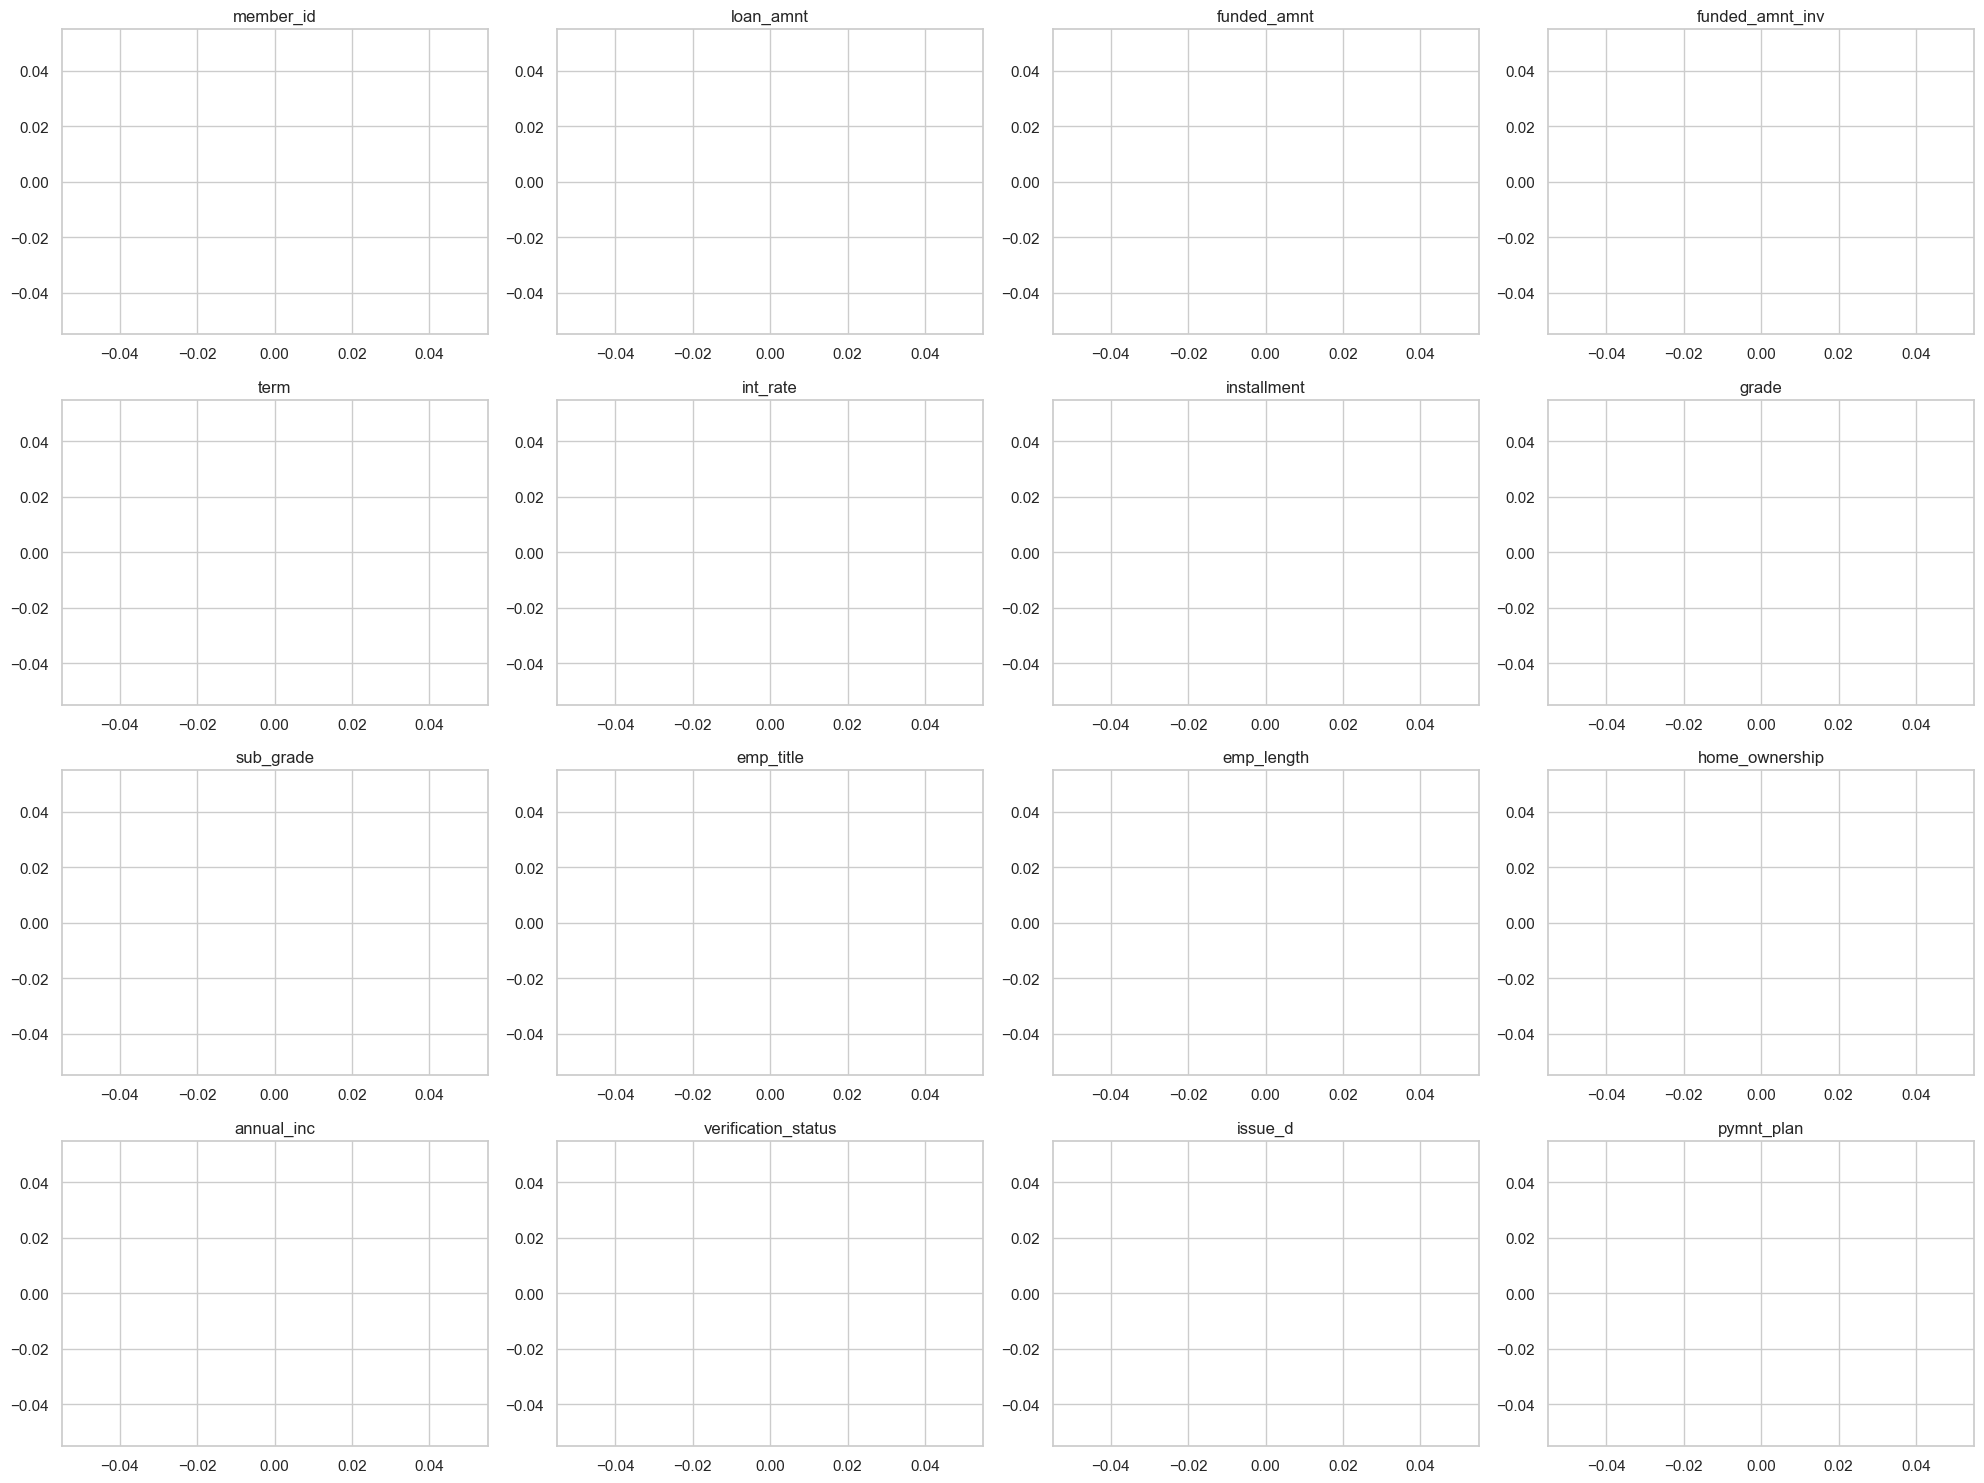

In [26]:
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'loan_status']  # Exclude target

# Plot histograms for numeric features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols[:16]):  # Plot first 16 for readability
    plt.subplot(4, 4, i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

TypeError: 'NoneType' object is not iterable

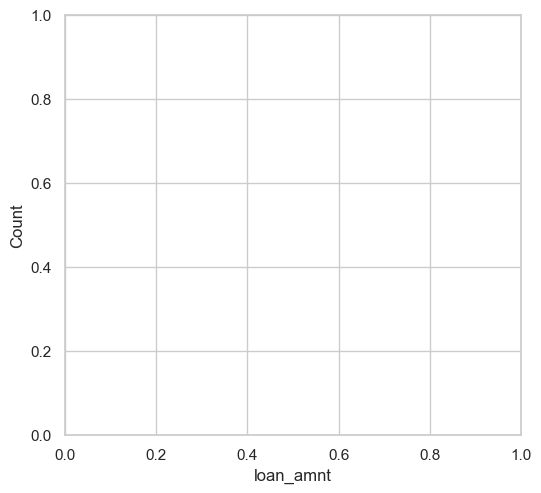

In [28]:
# Distribution of key financial features
key_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util']
plt.figure(figsize=(20, 12))
for i, col in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=col, data=df_clean, hue='loan_status', element='step', common_norm=False, bins=30)
    plt.title(f'Distribution of {col} by Loan Status')
plt.tight_layout()
plt.show()